In [2]:
from scipy import *
from astropy.io import fits
import WLanalysis

In [19]:
plane_massive = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/snap60_potentialPlane2_normal0.fits')[0].data
plane_massles = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/snap60_potentialPlane2_normal0.fits')[0].data

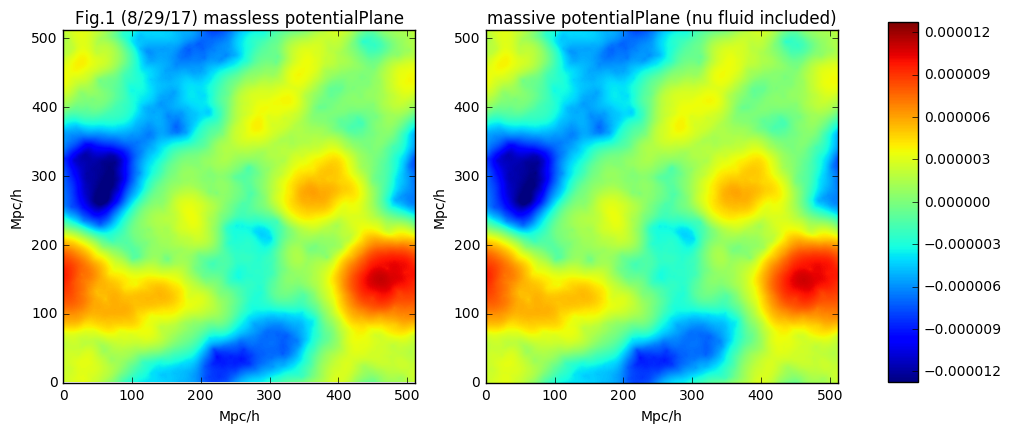

In [22]:
f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

istd=std(plane_massles)
clb1=ax1.imshow(plane_massles,extent=[0,512, 0,512],vmin=-3*istd,vmax=3*istd)
ax1.set_xlabel('Mpc/h')
ax1.set_ylabel('Mpc/h')
ax1.set_title('Fig.1 (8/29/17) massless potentialPlane')

ax2.imshow(plane_massive,extent=[0,512, 0,512],vmin=-3*istd,vmax=3*istd)
ax2.set_xlabel('Mpc/h')
ax2.set_ylabel('Mpc/h')
ax2.set_title('massive potentialPlane (nu fluid included)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb1, cax=cbar_ax)
show()

In [23]:
conv_massive_z1 = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1.00_0001r.fits')[0].data
conv_massles_z1 = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1.00_0001r.fits')[0].data

In [24]:
conv_massive_z1100 = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1100.00_0001r.fits')[0].data
conv_massles_z1100 = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1100.00_0001r.fits')[0].data

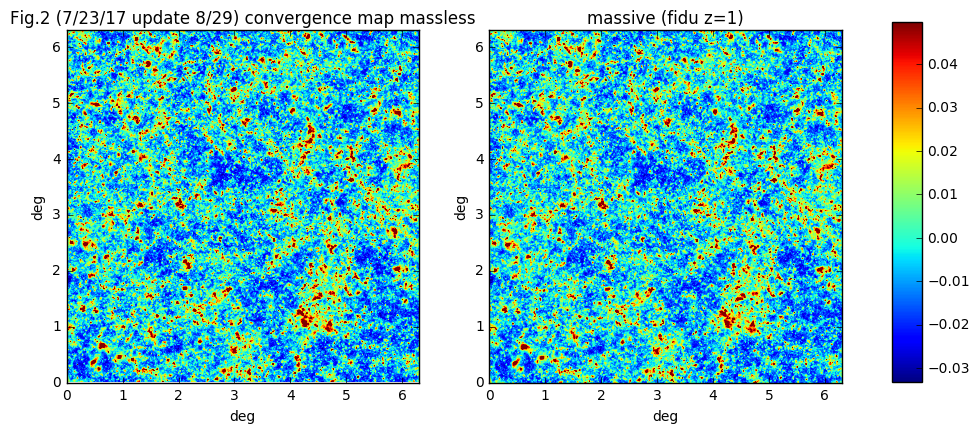

In [25]:
istd = std(conv_massive_z1)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(conv_massles_z1,extent=[0,6.3, 0,6.3],vmin=-2*istd, vmax=3*istd)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.2 (7/23/17 update 8/29) convergence map massless')

clb2=ax2.imshow(conv_massive_z1,extent=[0,6.3, 0,6.3],vmin=-2*istd, vmax=3*istd)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('massive (fidu z=1)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

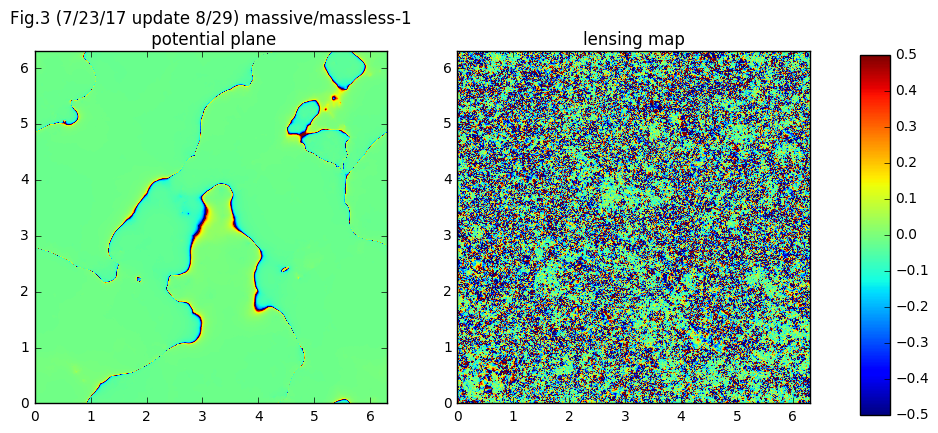

In [27]:
f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(plane_massive/plane_massles-1,extent=[0,6.3, 0,6.3],vmin=-0.5,vmax=0.5)

clb2=ax2.imshow(conv_massive_z1/conv_massles_z1-1,extent=[0,6.3, 0,6.3],vmin=-0.5,vmax=0.5)
cbar_ax2 = f.add_axes([0.95, 0.2, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax2)

ax1.set_title('Fig.3 (7/23/17 update 8/29) massive/massless-1\n potential plane')
ax2.set_title('lensing map')

show()

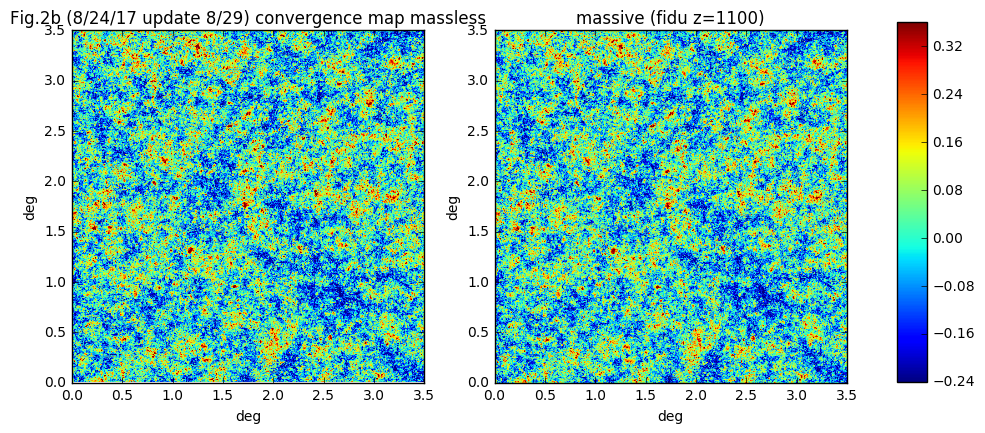

In [26]:
istd = std(conv_massive_z1100)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(conv_massles_z1100,extent=[0,3.5, 0,3.5],vmin=-2*istd, vmax=3*istd)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.2b (8/24/17 update 8/29) convergence map massless')

clb2=ax2.imshow(conv_massive_z1100,extent=[0,3.5, 0,3.5],vmin=-2*istd, vmax=3*istd)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('massive (fidu z=1100)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

In [28]:
ell0_As, ps0_As = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_fidumassless_As').T
ell0_s8, ps0_s8 = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_fidumassless_s8').T
ell0_s8_linear, ps0_s8_linear = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_massless_s8_linear').T

In [29]:
def ps_gen (fn,sizedeg=6.3**2):
    ikappamap = fits.open(fn)[0].data
    ell, ps = WLanalysis.PowerSpectrum(ikappamap, sizedeg = sizedeg)
    return ell, ps

In [31]:
out0 = array([ps_gen('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1.00_000%ir.fits'%(i)) for i in range(1,10)])
#print out.shape, mean(out, axis=0).shape
ell, ps0_z1 = mean(out0, axis=0)

out1 = array([ps_gen('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1.00_000%ir.fits'%(i)) for i in range(1,10)])
#print out.shape, mean(out, axis=0).shape
ell, ps1_z1 = mean(out1, axis=0)

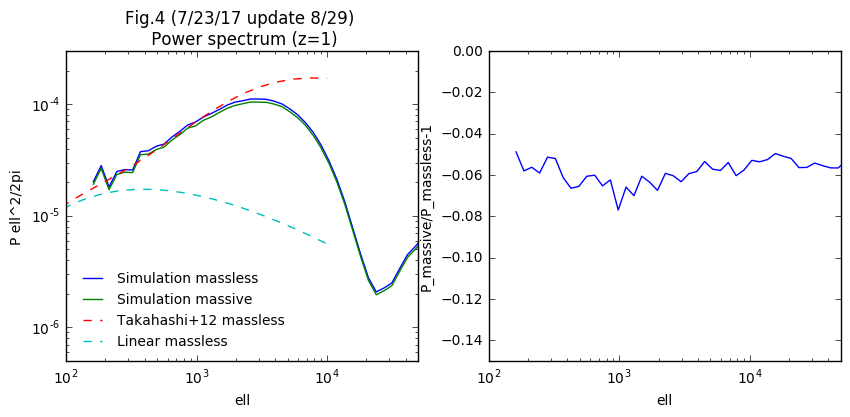

In [36]:
f=figure(figsize=(10,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

ax1.loglog(ell, ps0_z1,label='Simulation massless')
ax1.loglog(ell, ps1_z1,label='Simulation massive')
#loglog(ell_As, ps_As,'--',label='nicaea, normalization=A_s')
ax1.loglog(ell0_s8, ps0_s8,'--',label='Takahashi+12 massless')
ax1.loglog(ell0_s8_linear, ps0_s8_linear,'--',label='Linear massless')
#loglog(ell_nicaea_linear, ps_nicaea_linear,'--')
ax1.set_xlabel('ell')
ax1.set_ylabel('P ell^2/2pi')
ax1.set_xlim(1e2, 5e4)
ax1.set_ylim(5e-7, 3e-4)
ax1.legend(loc=0,frameon=0,fontsize=10)
ax1.set_title('Fig.4 (7/23/17 update 8/29) \n Power spectrum (z=1)')


ax2.plot(ell, ps1_z1/ps0_z1-1)
ax2.set_xscale('log')
ax2.set_xlim(1e2, 5e4)
ax2.set_ylim(-.15,0)
ax2.set_xlabel('ell')
ax2.set_ylabel('P_massive/P_massless-1')

show()

In [37]:
ell0_s8cmb, ps0_s8cmb = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_1100').T

In [39]:
out1100_0 = array([ps_gen('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1100.00_000%ir.fits'%(i),sizedeg=3.5**2) 
                 for i in range(1,10)])

ell1100, ps0_z1100 = mean(out1100_0, axis=0)

out1100_1 = array([ps_gen('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1100.00_000%ir.fits'%(i),sizedeg=3.5**2) 
                 for i in range(1,10)])

ell1100, ps1_z1100 = mean(out1100_1, axis=0)

In [67]:
from scipy.interpolate import interp1d

k_arr = logspace(-2,1.5,100)

####### test matter power spectrum for massive P_cdm vs P_matter
kcamb0_z2, Ptot0_z2 = loadtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_0.dat').T

kTF_z2, Ttot_z2, Tnn_z2, Tnu_z2 = loadtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/camb/camb_mnv0.10000_om0.30000_As2.1000_transfer_0.dat').T[[0,6,7,5]]
kcamb_z2, Ptot_z2 = loadtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_0.dat').T

Ptot0_z2_interp = interp1d(kcamb0_z2, Ptot0_z2)(k_arr)
Ptot_z2_interp = interp1d(kcamb_z2, Ptot_z2)(k_arr)

ratio_nn = interp1d(kTF_z2, (Tnn_z2/Ttot_z2)**2)(k_arr)

Pnonu_z2_interp = Ptot_z2_interp * ratio_nn

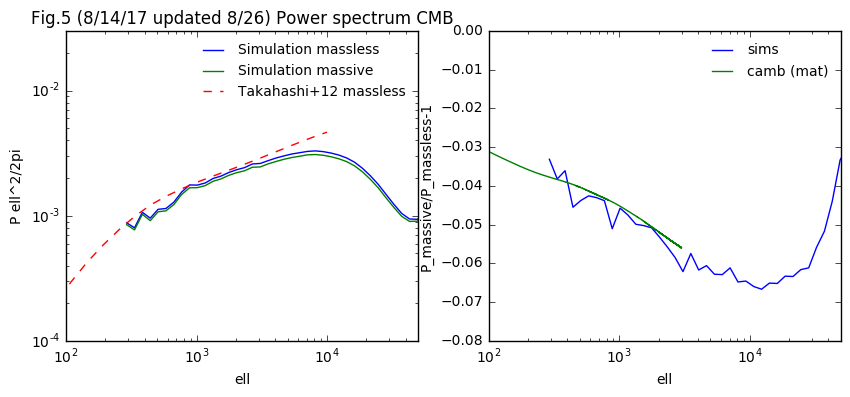

In [42]:
kmat0, pmat0 = loadtxt('camb/camb_mat_massless.txt').T
kmat1, pmat1 = loadtxt('camb/camb_mat_massive.txt').T

f=figure(figsize=(10,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

ax1.loglog(ell1100, ps0_z1100,label='Simulation massless')
ax1.loglog(ell1100, ps1_z1100,label='Simulation massive')
ax1.loglog(ell0_s8cmb, ps0_s8cmb,'--',label='Takahashi+12 massless')

ax1.set_xlabel('ell')
ax1.set_ylabel('P ell^2/2pi')
ax1.set_xlim(1e2, 5e4)
ax1.set_ylim(1e-4, 3e-2)
ax1.legend(loc=0,frameon=0,fontsize=10)
ax1.set_title('Fig.5 (8/14/17 updated 8/26) Power spectrum CMB')

ax2.plot(ell1100, ps1_z1100/ps0_z1100-1, label='sims')
#ax2.plot(ell1100, ps1_z1100/mean(ratio_nn)/ps0_z1100-1, label='sims * (P_cdm_bary_nu / P_cdm_bary)')
ax2.plot(kmat1, pmat1/pmat0-1,label='camb (mat)')
ax2.set_xscale('log')
ax2.legend(loc=0,frameon=0,fontsize=10)
ax2.set_xlim(1e2, 5e4)
ax2.set_ylim(-.08,0)
ax2.set_xlabel('ell')
ax2.set_ylabel('P_massive/P_massless-1')

show()

In [69]:
kbird0,pbird_tot0 = loadtxt('/Users/jia/neutrino-batch/matterpower/mnv0.00000_om0.30000_As2.1000/powerspec_tot_066.txt').T
kbird1,pbird_tot = loadtxt('/Users/jia/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_tot_066.txt').T
kbird1,pbird_nu = loadtxt('/Users/jia/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_nu_066.txt').T

kbird0 *= 1e3
kbird1 *= 1e3

pbird_tot0 *=1e-9
pbird_tot *=1e-9
pbird_nu *= 1e-9

pbird_tot0 = interp1d(kbird0,pbird_tot0,fill_value='extrapolate')(k_arr)
pbird_tot = interp1d(kbird1,pbird_tot,fill_value='extrapolate')(k_arr)
pbird_nu = interp1d(kbird1,pbird_nu,fill_value='extrapolate')(k_arr)

fnu=0.0073037589525825385
pbird_nonu = (sqrt(pbird_tot) - fnu*sqrt(pbird_nu))**2/(1-fnu)**2

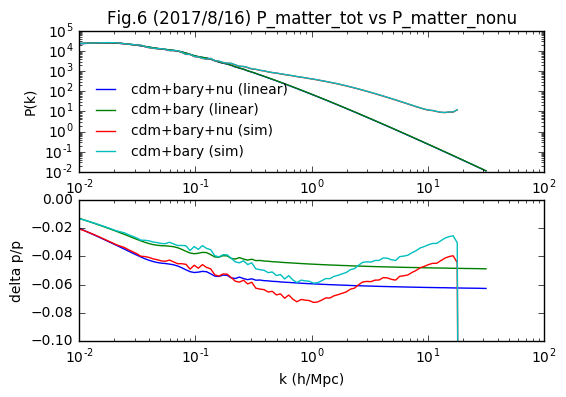

In [71]:
f=figure(figsize=(6,4))
ax1=f.add_subplot(211)
ax2=f.add_subplot(212)

ax1.loglog(k_arr, Ptot_z2_interp,label='cdm+bary+nu (linear)')
ax1.loglog(k_arr, Pnonu_z2_interp,label='cdm+bary (linear)')
ax1.loglog(k_arr, pbird_tot,label='cdm+bary+nu (sim)')
ax1.loglog(k_arr, pbird_nonu,label='cdm+bary (sim)')

ax1.set_ylabel('P(k)')
ax1.set_title('Fig.6 (2017/8/16) P_matter_tot vs P_matter_nonu')
ax1.legend(frameon=0,fontsize=10, loc=0)

ax2.plot(k_arr, Ptot_z2_interp/Ptot0_z2_interp-1, label='cdm+bary+nu')
ax2.plot(k_arr, Pnonu_z2_interp/Ptot0_z2_interp-1, label='cdm+bary')
ax2.plot(k_arr, pbird_tot/pbird_tot0-1, label='cdm+bary+nu')
ax2.plot(k_arr, pbird_nonu/pbird_tot0-1, label='cdm+bary')


ax2.set_xlabel('k (h/Mpc)')
ax2.set_xscale('log')
ax2.set_ylabel('delta p/p')
ax2.set_ylim(-0.1,0)
#ax2.legend(frameon=0)
show()

In [ ]:
savetxt('ps_massless1-9.txt',array([ell1100, ps0_z1100]).T)
savetxt('ps_massive1-9.txt',array([ell1100, ps1_z1100]).T)